# Employee Attrition Analysis

 PROBLEM STATEMENT

 XYZ company which was established a few years back is facing around a 15% attrition rate for
 a couple of years. And it's majorly affecting the company in many aspects. In order to
 understand why employees are leaving the company and reduce the attrition rate XYZ
 company has approached an HR analytics consultancy for analyzing the data they have. You
 are playing the HR analyst role in this project and building a dashboard which can help the
 organization in making data-driven decisions.

# Some Python Libraries

In the first place .lets define some libraries to help us in the manipulation the data set, such as 'Pandas','Numpy','matplotlib','Seaborn'. In this project , we are implementing a logistic Regression with 'Scikit-learn'. The goals here is to be simple as possible so to help this task,we implementing the ready-made libraries and their fuctionally.

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')


In [4]:
import os
os.chdir('D:/')

# Get the Data

In [5]:
data=pd.read_csv('Attrition data.csv')
data

,EmployeeID,Age,Attrition,BusinessTravel,Department,DistanceFromHome,Education,EducationField,EmployeeCount,Gender,...,TotalWorkingYears,TrainingTimesLastYear,YearsAtCompany,YearsSinceLastPromotion,YearsWithCurrManager,EnvironmentSatisfaction,JobSatisfaction,WorkLifeBalance,JobInvolvement,PerformanceRating
0,1,51,No,Travel_Rarely,Sales,6,2,Life Sciences,1,Female,...,1.0,6,1,0,0,3.0,4.0,2.0,3,3
1,2,31,Yes,Travel_Frequently,Research & Development,10,1,Life Sciences,1,Female,...,6.0,3,5,1,4,3.0,2.0,4.0,2,4
2,3,32,No,Travel_Frequently,Research & Development,17,4,Other,1,Male,...,5.0,2,5,0,3,2.0,2.0,1.0,3,3
3,4,38,No,Non-Travel,Research & Development,2,5,Life Sciences,1,Male,...,13.0,5,8,7,5,4.0,4.0,3.0,2,3
4,5,32,No,Travel_Rarely,Research & Development,10,1,Medical,1,Male,...,9.0,2,6,0,4,4.0,1.0,3.0,3,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4405,4406,42,No,Travel_Rarely,Research & Development,5,4,Medical,1,Female,...,10.0,5,3,0,2,4.0,1.0,3.0,3,3
4406,4407,29,No,Travel_Rarely,Research & Development,2,4,Medical,1,Male,...,10.0,2,3,0,2,4.0,4.0,3.0,2,3
4407,4408,25,No,Travel_Rarely,Research & Development,25,2,Life Sciences,1,Male,...,5.0,4,4,1,2,1.0,3.0,3.0,3,4
4408,4409,42,No,Travel_Rarely,Sales,18,2,Medical,1,Male,...,10.0,2,9,7,8,4.0,1.0,3.0,2,3


# Basic Data Exploration

This is an important step in Data science and machine learning to ensure about the cloumns,and rows present.
First, we will check the shape of the dataset.
Second, we will check the hand, tail, and sample of the datasets..
Third, we will check the data Decription .
Then, we will check the data Types of the columns present in the data.

In [6]:
data.head()

,EmployeeID,Age,Attrition,BusinessTravel,Department,DistanceFromHome,Education,EducationField,EmployeeCount,Gender,...,TotalWorkingYears,TrainingTimesLastYear,YearsAtCompany,YearsSinceLastPromotion,YearsWithCurrManager,EnvironmentSatisfaction,JobSatisfaction,WorkLifeBalance,JobInvolvement,PerformanceRating
0,1,51,No,Travel_Rarely,Sales,6,2,Life Sciences,1,Female,...,1.0,6,1,0,0,3.0,4.0,2.0,3,3
1,2,31,Yes,Travel_Frequently,Research & Development,10,1,Life Sciences,1,Female,...,6.0,3,5,1,4,3.0,2.0,4.0,2,4
2,3,32,No,Travel_Frequently,Research & Development,17,4,Other,1,Male,...,5.0,2,5,0,3,2.0,2.0,1.0,3,3
3,4,38,No,Non-Travel,Research & Development,2,5,Life Sciences,1,Male,...,13.0,5,8,7,5,4.0,4.0,3.0,2,3
4,5,32,No,Travel_Rarely,Research & Development,10,1,Medical,1,Male,...,9.0,2,6,0,4,4.0,1.0,3.0,3,3


In [7]:
pd.set_option('display.max_columns',None)

In [8]:
data.head()

,EmployeeID,Age,Attrition,BusinessTravel,Department,DistanceFromHome,Education,EducationField,EmployeeCount,Gender,JobLevel,JobRole,MaritalStatus,MonthlyIncome,NumCompaniesWorked,Over18,PercentSalaryHike,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,YearsAtCompany,YearsSinceLastPromotion,YearsWithCurrManager,EnvironmentSatisfaction,JobSatisfaction,WorkLifeBalance,JobInvolvement,PerformanceRating
0,1,51,No,Travel_Rarely,Sales,6,2,Life Sciences,1,Female,1,Healthcare Representative,Married,131160,1.0,Y,11,8,0,1.0,6,1,0,0,3.0,4.0,2.0,3,3
1,2,31,Yes,Travel_Frequently,Research & Development,10,1,Life Sciences,1,Female,1,Research Scientist,Single,41890,0.0,Y,23,8,1,6.0,3,5,1,4,3.0,2.0,4.0,2,4
2,3,32,No,Travel_Frequently,Research & Development,17,4,Other,1,Male,4,Sales Executive,Married,193280,1.0,Y,15,8,3,5.0,2,5,0,3,2.0,2.0,1.0,3,3
3,4,38,No,Non-Travel,Research & Development,2,5,Life Sciences,1,Male,3,Human Resources,Married,83210,3.0,Y,11,8,3,13.0,5,8,7,5,4.0,4.0,3.0,2,3
4,5,32,No,Travel_Rarely,Research & Development,10,1,Medical,1,Male,1,Sales Executive,Single,23420,4.0,Y,12,8,2,9.0,2,6,0,4,4.0,1.0,3.0,3,3


In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4410 entries, 0 to 4409
Data columns (total 29 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   EmployeeID               4410 non-null   int64  
 1   Age                      4410 non-null   int64  
 2   Attrition                4410 non-null   object 
 3   BusinessTravel           4410 non-null   object 
 4   Department               4410 non-null   object 
 5   DistanceFromHome         4410 non-null   int64  
 6   Education                4410 non-null   int64  
 7   EducationField           4410 non-null   object 
 8   EmployeeCount            4410 non-null   int64  
 9   Gender                   4410 non-null   object 
 10  JobLevel                 4410 non-null   int64  
 11  JobRole                  4410 non-null   object 
 12  MaritalStatus            4410 non-null   object 
 13  MonthlyIncome            4410 non-null   int64  
 14  NumCompaniesWorked      

In [10]:
data.describe()

,EmployeeID,Age,DistanceFromHome,Education,EmployeeCount,JobLevel,MonthlyIncome,NumCompaniesWorked,PercentSalaryHike,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,YearsAtCompany,YearsSinceLastPromotion,YearsWithCurrManager,EnvironmentSatisfaction,JobSatisfaction,WorkLifeBalance,JobInvolvement,PerformanceRating
count,4410.000000,4410.000000,4410.000000,4410.000000,4410.0,4410.000000,4410.000000,4391.000000,4410.000000,4410.0,4410.000000,4401.000000,4410.000000,4410.000000,4410.000000,4410.000000,4385.000000,4390.000000,4372.000000,4410.000000,4410.000000
mean,2205.500000,36.923810,9.192517,2.912925,1.0,2.063946,65029.312925,2.694830,15.209524,8.0,0.793878,11.279936,2.799320,7.008163,2.187755,4.123129,2.723603,2.728246,2.761436,2.729932,3.153741
std,1273.201673,9.133301,8.105026,1.023933,0.0,1.106689,47068.888559,2.498887,3.659108,0.0,0.851883,7.782222,1.288978,6.125135,3.221699,3.567327,1.092756,1.101253,0.706245,0.711400,0.360742
min,1.000000,18.000000,1.000000,1.000000,1.0,1.000000,10090.000000,0.000000,11.000000,8.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,3.000000
25%,1103.250000,30.000000,2.000000,2.000000,1.0,1.000000,29110.000000,1.000000,12.000000,8.0,0.000000,6.000000,2.000000,3.000000,0.000000,2.000000,2.000000,2.000000,2.000000,2.000000,3.000000
50%,2205.500000,36.000000,7.000000,3.000000,1.0,2.000000,49190.000000,2.000000,14.000000,8.0,1.000000,10.000000,3.000000,5.000000,1.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000
75%,3307.750000,43.000000,14.000000,4.000000,1.0,3.000000,83800.000000,4.000000,18.000000,8.0,1.000000,15.000000,3.000000,9.000000,3.000000,7.000000,4.000000,4.000000,3.000000,3.000000,3.000000
max,4410.000000,60.000000,29.000000,5.000000,1.0,5.000000,199990.000000,9.000000,25.000000,8.0,3.000000,40.000000,6.000000,40.000000,15.000000,17.000000,4.000000,4.000000,4.000000,4.000000,4.000000


# Check Duplicates

In [11]:
print(data.duplicated().value_counts())
data.drop_duplicates(inplace=True)
print(len(data))

False    4410
dtype: int64
4410


# Checking missing value

In [12]:
data.isnull().sum()

EmployeeID                  0
Age                         0
Attrition                   0
BusinessTravel              0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
EmployeeCount               0
Gender                      0
JobLevel                    0
JobRole                     0
MaritalStatus               0
MonthlyIncome               0
NumCompaniesWorked         19
Over18                      0
PercentSalaryHike           0
StandardHours               0
StockOptionLevel            0
TotalWorkingYears           9
TrainingTimesLastYear       0
YearsAtCompany              0
YearsSinceLastPromotion     0
YearsWithCurrManager        0
EnvironmentSatisfaction    25
JobSatisfaction            20
WorkLifeBalance            38
JobInvolvement              0
PerformanceRating           0
dtype: int64

In [13]:
data['NumCompaniesWorked']= data['NumCompaniesWorked'].fillna(data['NumCompaniesWorked'].median())

In [14]:
data['EnvironmentSatisfaction']=data['EnvironmentSatisfaction'].fillna(data['EnvironmentSatisfaction'].median())

In [15]:
data['JobSatisfaction']=data['JobSatisfaction'].fillna(data['JobSatisfaction'].median())

In [16]:
data['WorkLifeBalance']=data['WorkLifeBalance'].fillna(data['WorkLifeBalance'].median())

In [17]:
data['TotalWorkingYears']=data['TotalWorkingYears'].fillna(data['TotalWorkingYears'].median())

In [18]:
data.isna().sum()

EmployeeID                 0
Age                        0
Attrition                  0
BusinessTravel             0
Department                 0
DistanceFromHome           0
Education                  0
EducationField             0
EmployeeCount              0
Gender                     0
JobLevel                   0
JobRole                    0
MaritalStatus              0
MonthlyIncome              0
NumCompaniesWorked         0
Over18                     0
PercentSalaryHike          0
StandardHours              0
StockOptionLevel           0
TotalWorkingYears          0
TrainingTimesLastYear      0
YearsAtCompany             0
YearsSinceLastPromotion    0
YearsWithCurrManager       0
EnvironmentSatisfaction    0
JobSatisfaction            0
WorkLifeBalance            0
JobInvolvement             0
PerformanceRating          0
dtype: int64

# Target variable

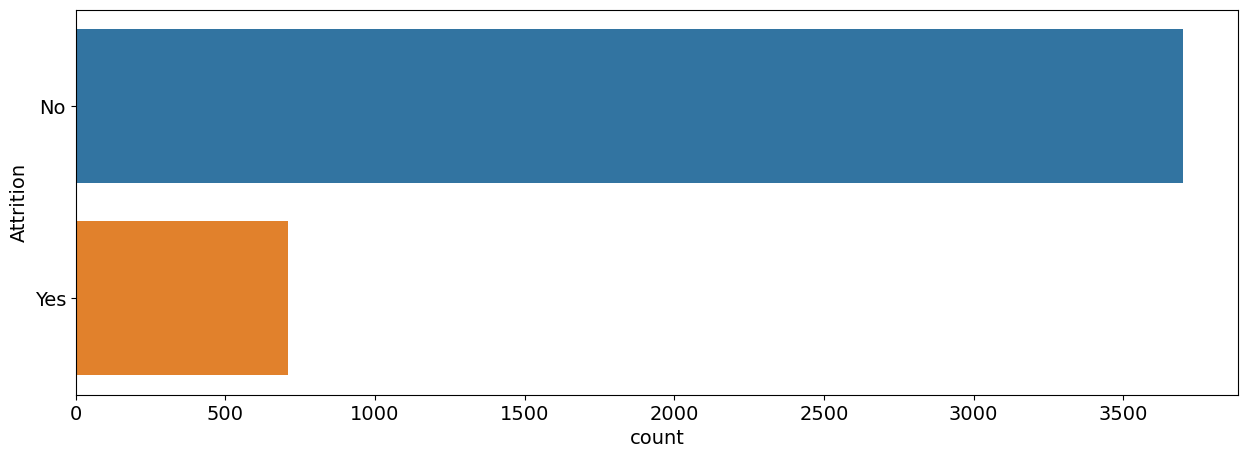

In [19]:
plt.figure(figsize=(15,5))
plt.rc("font",size=14)
sns.countplot(y='Attrition',data=data)
plt.show()

 Over here we noticed the target columns is highly imbalanced, we need to balance the data by using some statistical methods.

# Exploratory Data Analysis

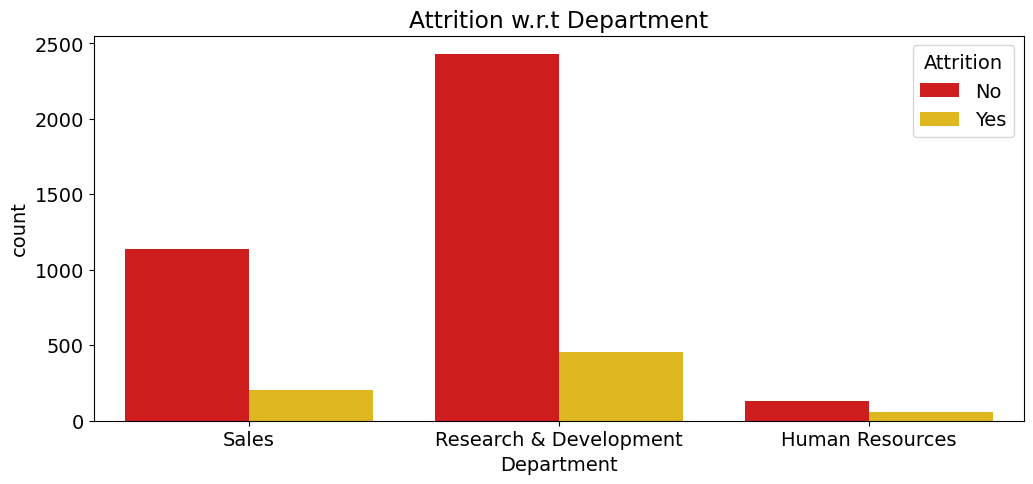

In [20]:
# Department wrt Attrition
plt.figure(figsize=(12,5))
sns.countplot(x='Department', hue='Attrition', data=data, palette='hot')
plt.title("Attrition w.r.t Department")
plt.show() 

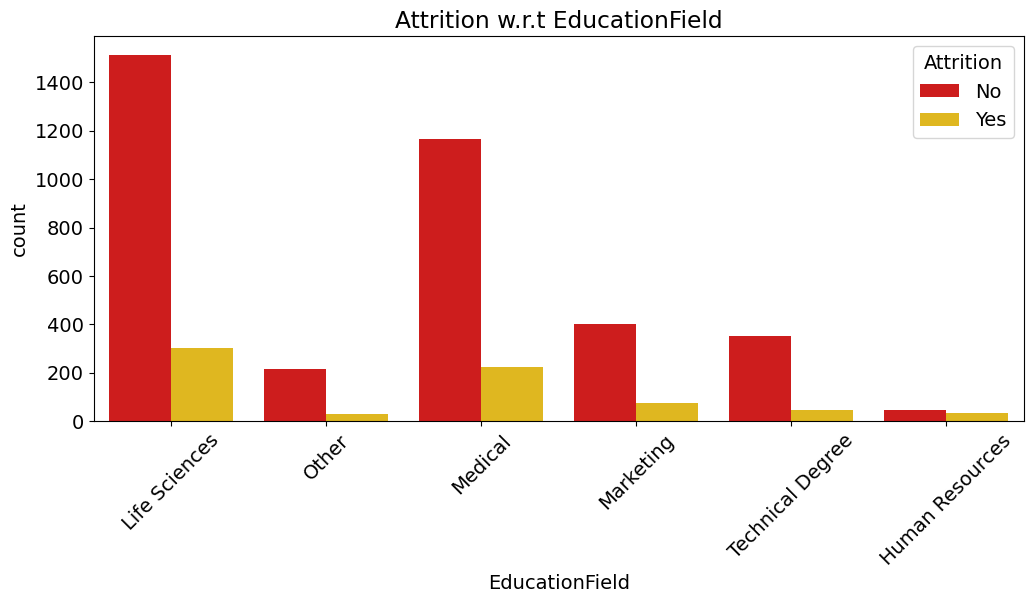

In [20]:
# Department wrt Attrition
plt.figure(figsize=(12,5))
sns.countplot(x='EducationField',hue='Attrition',data=data, palette='hot')
plt.title("Attrition w.r.t EducationField")
plt.xticks(rotation=45)
plt.show()

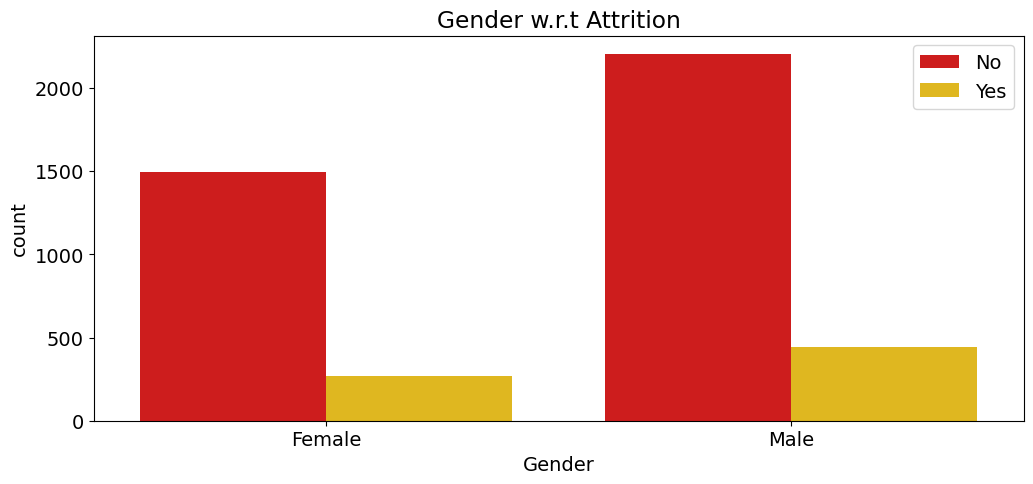

In [21]:
# most male of female employes Attrition
# department wrt Attrition
plt.figure(figsize=(12,5))
sns.countplot(x='Gender',hue='Attrition',data=data, palette='hot')
plt.title('Gender w.r.t Attrition')
plt.legend(loc='best')
plt.show()


Oberservation:
    employees working in R&D department are more ,but employees from sales department or sales department or at position likes sales execution,sales Repreaentative leaves the job early.
    Males are more Attrition then Females

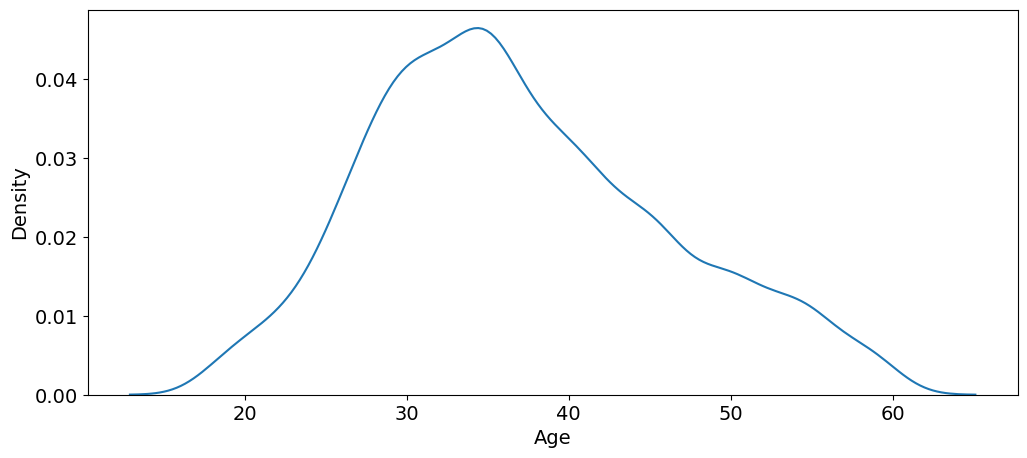

In [22]:
# Distribution of age
plt.figure(figsize=(12,5))
sns.distplot(data['Age'],hist=False)
plt.show()

 Age column is very well normalized, most of employees are age between 25 to 40.
    we are having some of the numerical column which are label encoded for us, they are label encoded for us, they are ordinal labels, so lets have a look at them first.

In [23]:
ordinal_features = ['Education','EnvironmentSatisfaction','JobInvolvement','JobSatisfaction','PerformanceRating','WorkLifeBalance']
data[ordinal_features].head()

,Education,EnvironmentSatisfaction,JobInvolvement,JobSatisfaction,PerformanceRating,WorkLifeBalance
0,2,3.0,3,4.0,3,2.0
1,1,3.0,2,2.0,4,4.0
2,4,2.0,3,2.0,3,1.0
3,5,4.0,2,4.0,3,3.0
4,1,4.0,3,1.0,3,3.0


edu_map={1:'Below College',2:'College',3:'Bacheler',4:'Master',5:'Doctor'}
plt.figure(figsize=(12,5))
sns.countplot(x=data['Education'].map(edu_map),hue='Attrition',data=data, palette='hot')
plt.title("Education w.r.t Attrition")
plt.show()

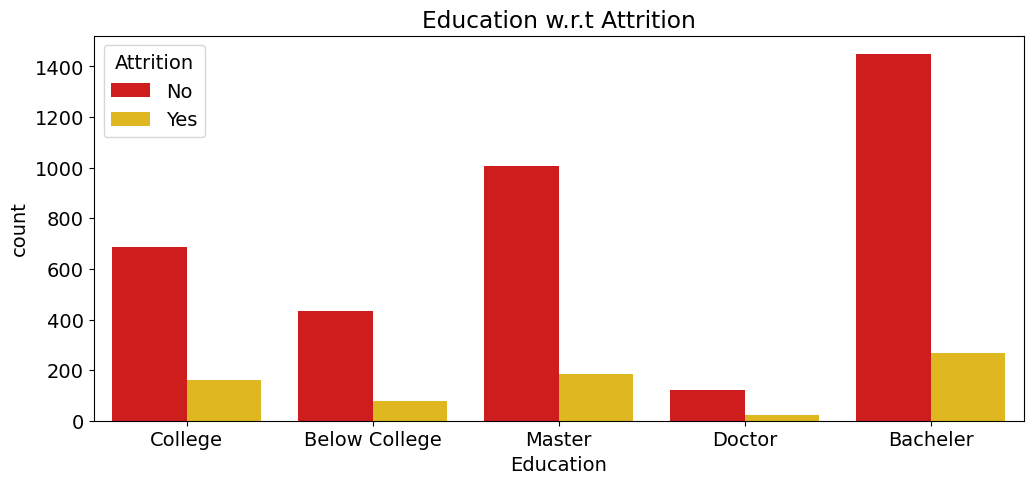

In [24]:
edu_map={1:'Below College',2:'College',3:'Bacheler',4:'Master',5:'Doctor'} 
plt.figure(figsize=(12,5)) 
sns.countplot(x=data['Education'].map(edu_map),hue='Attrition',data=data, palette='hot') 
plt.title("Education w.r.t Attrition") 
plt.show()

Oberservations
Employees from Bachelor are more, then from masters background.Attrition wrt bachelor can be seen more because they have more and more expection from comapny and it will be interested to see the reason behind this in this dataset

# Label Encoding

In the machine learning, we usually deals with datasets that contain multiple labels in one or more than one column. these labels can be in the form words or numbers. To make data understandable or human-interesting to see the reason behind this in the  dataset.

In [25]:
#Target variable(Attrition)
data['Attrition']=data['Attrition'].replace({'No':0,'Yes':1})

In [26]:
#Encode binary vaiable
data['Over18']=data['Over18'].map({'No':0,'Y':1})
data['Gender']=data['Gender'].map({'Male':0,'Female':1})

In [27]:
data['Over18']

0       1
1       1
2       1
3       1
4       1
       ..
4405    1
4406    1
4407    1
4408    1
4409    1
Name: Over18, Length: 4410, dtype: int64

In [28]:
# Encode categorical column which are ordinal, use labelencoding
#apply Label encoder to df_categorical
from sklearn.preprocessing import LabelEncoder
encoding_cols=['BusinessTravel','Department','EducationField','JobRole','MaritalStatus']
label_encoders={}
for column in encoding_cols:
    label_encoders[column]=LabelEncoder()
    data[column]=label_encoders[column].fit_transform(data[column])

In [29]:
data.head()# look at the final data

,EmployeeID,Age,Attrition,BusinessTravel,Department,DistanceFromHome,Education,EducationField,EmployeeCount,Gender,JobLevel,JobRole,MaritalStatus,MonthlyIncome,NumCompaniesWorked,Over18,PercentSalaryHike,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,YearsAtCompany,YearsSinceLastPromotion,YearsWithCurrManager,EnvironmentSatisfaction,JobSatisfaction,WorkLifeBalance,JobInvolvement,PerformanceRating
0,1,51,0,2,2,6,2,1,1,1,1,0,1,131160,1.0,1,11,8,0,1.0,6,1,0,0,3.0,4.0,2.0,3,3
1,2,31,1,1,1,10,1,1,1,1,1,6,2,41890,0.0,1,23,8,1,6.0,3,5,1,4,3.0,2.0,4.0,2,4
2,3,32,0,1,1,17,4,4,1,0,4,7,1,193280,1.0,1,15,8,3,5.0,2,5,0,3,2.0,2.0,1.0,3,3
3,4,38,0,0,1,2,5,1,1,0,3,1,1,83210,3.0,1,11,8,3,13.0,5,8,7,5,4.0,4.0,3.0,2,3
4,5,32,0,2,1,10,1,3,1,0,1,7,2,23420,4.0,1,12,8,2,9.0,2,6,0,4,4.0,1.0,3.0,3,3


In [30]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4410 entries, 0 to 4409
Data columns (total 29 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   EmployeeID               4410 non-null   int64  
 1   Age                      4410 non-null   int64  
 2   Attrition                4410 non-null   int64  
 3   BusinessTravel           4410 non-null   int32  
 4   Department               4410 non-null   int32  
 5   DistanceFromHome         4410 non-null   int64  
 6   Education                4410 non-null   int64  
 7   EducationField           4410 non-null   int32  
 8   EmployeeCount            4410 non-null   int64  
 9   Gender                   4410 non-null   int64  
 10  JobLevel                 4410 non-null   int64  
 11  JobRole                  4410 non-null   int32  
 12  MaritalStatus            4410 non-null   int32  
 13  MonthlyIncome            4410 non-null   int64  
 14  NumCompaniesWorked      

In [31]:
data['NumCompaniesWorked']

0       1.0
1       0.0
2       1.0
3       3.0
4       4.0
       ... 
4405    3.0
4406    2.0
4407    0.0
4408    0.0
4409    0.0
Name: NumCompaniesWorked, Length: 4410, dtype: float64

# Machine Learning: Splitting the data into Traning and Testing Sample
    

we dont use the full for creating the model. some data is randomly selected and  kept aside for checking how good the model is . This is known as Testing Data and the Remaining data is called training data on which the  model is bulit. Typically 70% of  data is used as Training data and the rest 30% is used as Testing data.

In [32]:
x=data.drop(['Attrition','Over18'],axis=1)
y=data['Attrition'].values

# Resampling

In [1]:
pip install imblearn

Note: you may need to restart the kernel to use updated packages.


In [35]:
from collections import Counter
from imblearn.over_sampling import RandomOverSampler
print(Counter(y))
rus=RandomOverSampler(random_state=42)
X_over,y_over = rus.fit_resample(x,y) 
print(Counter(y_over))

Counter({0: 3699, 1: 711})
Counter({0: 3699, 1: 3699})


In [38]:
# split the data into training and Testing set
from sklearn.model_selection import train_test_split
x_train,x_test, Y_train, y_test=train_test_split(X_over,y_over, test_size=0.2, random_state=42)

In [42]:
# sanity check for the sampled data
print(x_train.shape)
print(x_test.shape)
print(Y_train.shape)
print(y_test.shape)

(5918, 27)
(1480, 27)
(5918,)
(1480,)


# Logistic Regression

In [69]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, accuracy_score, roc_curve, roc_auc_score

In [70]:
logreg= LogisticRegression()
logreg.fit(x_train, Y_train)

LogisticRegression()

In [71]:
prediction=logreg.predict(x_test)
cnf_matrix= confusion_matrix(y_test,prediction)
print("Accuracy Score-",accuracy_score(y_test, prediction))

Accuracy Score- 0.6371621621621621


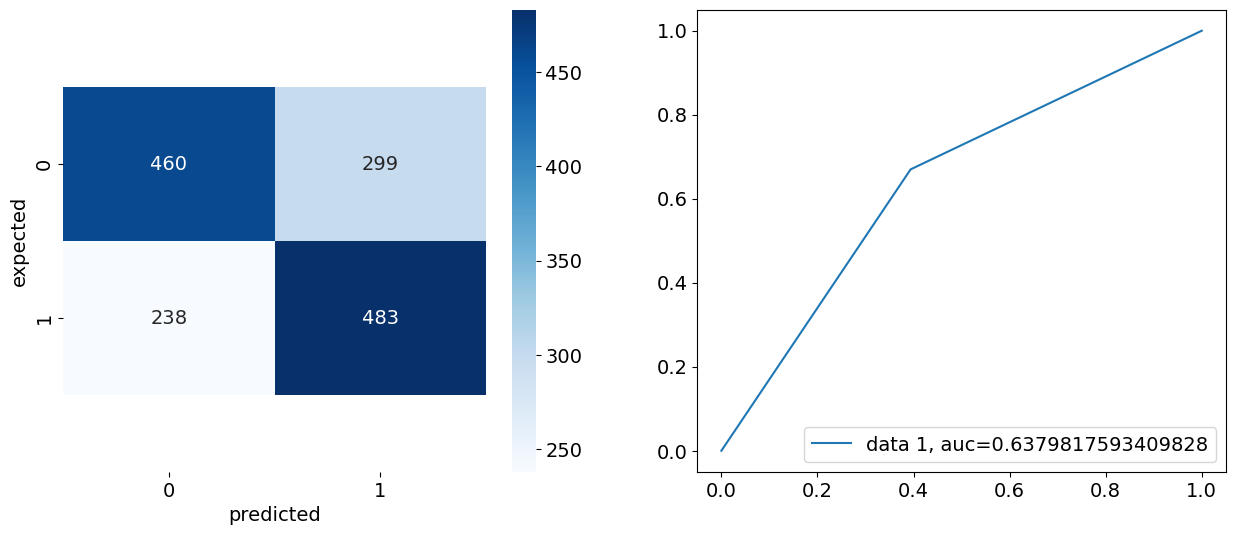

In [73]:
fig= plt. figure(figsize=(15,6))
ax1 = fig.add_subplot(1,2,1)
ax1 = sns.heatmap(pd.DataFrame(cnf_matrix), annot = True , cmap= 'Blues' , fmt = 'd')
bottom, top = ax1.get_ylim()
ax1.set_ylim(bottom + 0.5, top - 0.5)
plt.xlabel('predicted')
plt.ylabel('expected')


ax2= fig. add_subplot(1,2,2)
y_pred_proba = logreg.predict_proba(x_test)[::1]
fpe, tpr, _ = roc_curve( y_test, prediction)
auc = roc_auc_score(y_test, prediction)
ax2 = plt.plot(fpe, tpr, label = "data 1, auc="+str(auc))
plt.legend(loc=4)
plt.show()